Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-224e8541b398>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  rects = np.array(rects)


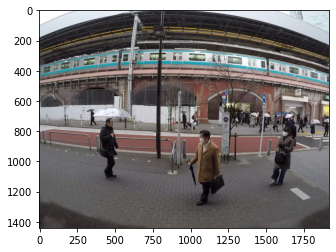

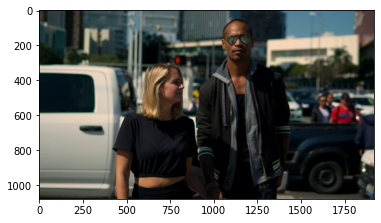

Haar-cascade分類器で検出された人数 (img01): 11
Haar-cascade分類器で検出された人数 (img02): 0
HOG+SVM分類器で検出された人数 (img01): 2
HOG+SVM分類器で検出された人数 (img02): 2
合計検出された人数: 15


In [3]:
# Haar-cascade分類器とHOG+SVM分類器を用いた人物カウント

import cv2
import imutils
import numpy as np
import random
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

# Google Drive上の画像ファイルのパスを指定して、画像を読み込みます。
img01_path = '/content/drive/My Drive/img01.jpg'
img01 = cv2.imread(img01_path)
img02_path = '/content/drive/My Drive/img02.jpg'
img02 = cv2.imread(img02_path)

# Haar-cascade分類器を用いて人を検出します。
cascade_path = cv2.data.haarcascades + "haarcascade_fullbody.xml"
cascade = cv2.CascadeClassifier(cascade_path)
gray_img01 = cv2.cvtColor(img01, cv2.COLOR_BGR2GRAY)
gray_img02 = cv2.cvtColor(img02, cv2.COLOR_BGR2GRAY)
rects_img01 = cascade.detectMultiScale(gray_img01, scaleFactor=1.05, minNeighbors=3)
rects_img02 = cascade.detectMultiScale(gray_img02, scaleFactor=1.05, minNeighbors=5)

# HOG+SVM分類器を用いて人を検出します。
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
rects_img01_hog = hog.detectMultiScale(img01, winStride=(4, 4), padding=(8, 8), scale=1.05)
rects_img02_hog = hog.detectMultiScale(img02, winStride=(4, 4), padding=(8, 8), scale=1.05)

# Haar-cascade分類器とHOG+SVM分類器で検出された人をすべて結合します。
rects = list(rects_img01) + list(rects_img02) + list(rects_img01_hog) + list(rects_img02_hog)
rects = np.array(rects)

# 矩形の要素数が異なる場合に対応するため、矩形を4つの要素に絞り込みます。
rects = [rect[:4] for rect in rects]

# 画像をBGRからRGBに変換します。
img_rgb = cv2.cvtColor(img01, cv2.COLOR_BGR2RGB)
img_rgb2 = cv2.cvtColor(img02, cv2.COLOR_BGR2RGB)

# 画像を表示します。
plt.imshow(img_rgb)
plt.show()

plt.imshow(img_rgb2)
plt.show()


# 画像をファイルに保存します。
output_path = '/content/drive/My Drive/output.jpg'
plt.imsave(output_path, img_rgb)

# Haar-cascade分類器とHOG+SVM分類器で検出された人の数を出力します。
print("Haar-cascade分類器で検出された人数 (img01): {}".format(len(rects_img01)))
print("Haar-cascade分類器で検出された人数 (img02): {}".format(len(rects_img02)))
print("HOG+SVM分類器で検出された人数 (img01): {}".format(len(rects_img01_hog)))
print("HOG+SVM分類器で検出された人数 (img02): {}".format(len(rects_img02_hog)))
print("合計検出された人数: {}".format(len(rects)))
